In [ ]:
!pip install python-binance ta

In [40]:
# Importation des librairies
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Variables pour les données
client = Client(tld='us')
pair_symbol = "BTCUSDT"
time_interval = Client.KLINE_INTERVAL_1HOUR
start_date = "01 january 2020"

# Récupération des données
klinesT = client.get_historical_klines(pair_symbol, time_interval, start_date)

# Créer un tableau grâce aux données
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])

# Supprime les colonnes inutiles
df.drop(columns = df.columns.difference(['timestamp','open','high','low','close','volume']), inplace=True)

# Convertit les colonnes en numéric
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Convertit les dates dans un format lisible
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

# Affiche le tableau
df

,open,high,low,close,volume
timestamp,,,,,
2020-01-01 00:00:00,7180.46,7182.19,7175.62,7175.62,1.675424
2020-01-01 01:00:00,7178.39,7226.82,7178.39,7212.38,4.299518
2020-01-01 02:00:00,7213.97,7238.03,7212.30,7238.03,4.444675
2020-01-01 03:00:00,7237.88,7237.88,7221.65,7230.71,2.340828
2020-01-01 04:00:00,7226.19,7226.19,7216.00,7216.00,0.614507
...,...,...,...,...,...
2025-02-20 06:00:00,97031.42,97031.42,96836.83,96888.95,0.562890
2025-02-20 07:00:00,96895.91,97128.23,96836.83,97016.34,0.086800
2025-02-20 08:00:00,97013.30,97235.54,96836.83,97160.56,0.099270


In [41]:
# Ajout de nouvelle colonne dans le tableau représentant nos indicateurs
df['SMA9'] = ta.trend.sma_indicator(close = df['close'], window = 9) # Moyenne simple courte
df['SMA200'] = ta.trend.sma_indicator(close = df['close'], window = 200) # Moyenne simple courte

#-------Bollinger-----------
df["BOL_HIGHER"] = ta.volatility.bollinger_hband_indicator(df['close'],window=20,window_dev=2)#return un binaire
df["BOL_LOWER"] = ta.volatility.bollinger_lband_indicator(df['close'],window=20,window_dev=2)#return un binaire


#-------Keltner-------
df["KEL_HIGHER"] = ta.volatility.keltner_channel_hband_indicator(df['high'],df['low'],df['close'],window=20,window_atr=10)#return un binaire
df["KEL_LOWER"] = ta.volatility.keltner_channel_lband_indicator(df['high'],df['low'],df['close'],window=20,window_atr=10)#return un binaire

#-------ATR-----------
df["ATR"] = ta.volatility.average_true_range(df['high'],df['low'],df['close'],window=2)


# Affiche notre nouveau tableau
df

,open,high,low,close,volume,SMA9,SMA200,BOL_HIGHER,BOL_LOWER,KEL_HIGHER,KEL_LOWER,ATR
timestamp,,,,,,,,,,,,
2020-01-01 00:00:00,7180.46,7182.19,7175.62,7175.62,1.675424,NaN,NaN,0.0,0.0,0.0,0.0,0.000000
2020-01-01 01:00:00,7178.39,7226.82,7178.39,7212.38,4.299518,NaN,NaN,0.0,0.0,0.0,0.0,28.885000
2020-01-01 02:00:00,7213.97,7238.03,7212.30,7238.03,4.444675,NaN,NaN,0.0,0.0,1.0,0.0,27.307500
2020-01-01 03:00:00,7237.88,7237.88,7221.65,7230.71,2.340828,NaN,NaN,0.0,0.0,0.0,0.0,21.843750
2020-01-01 04:00:00,7226.19,7226.19,7216.00,7216.00,0.614507,NaN,NaN,0.0,0.0,0.0,0.0,18.276875
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-20 06:00:00,97031.42,97031.42,96836.83,96888.95,0.562890,96877.751111,96505.29145,0.0,0.0,0.0,0.0,293.854236
2025-02-20 07:00:00,96895.91,97128.23,96836.83,97016.34,0.086800,96932.171111,96511.63010,0.0,0.0,1.0,0.0,292.627118
2025-02-20 08:00:00,97013.30,97235.54,96836.83,97160.56,0.099270,96988.898889,96517.25855,0.0,0.0,1.0,0.0,345.668559


Period: [2020-01-01 00:00:00] -> [2025-02-20 00:00:00]
Initial wallet: 1000.0 $

--- General Information ---
Final wallet: 1379.65 $
Performance vs US dollar: 37.96 %
Worst Drawdown : -47.42%
Buy and hold performance: 1249.18 %
Performance vs buy and hold: -89.77 %
Total trades on the period: 238
Global Win rate: 29.41 %
Average Profit: 0.28 %
Total fee: 437.61 $

Best trades: +8.37 % the 2020-08-17 15:00:00
Worst trades: -17.64 % the 2021-02-26 07:00:00

--- Plot wallet evolution vs asset ---


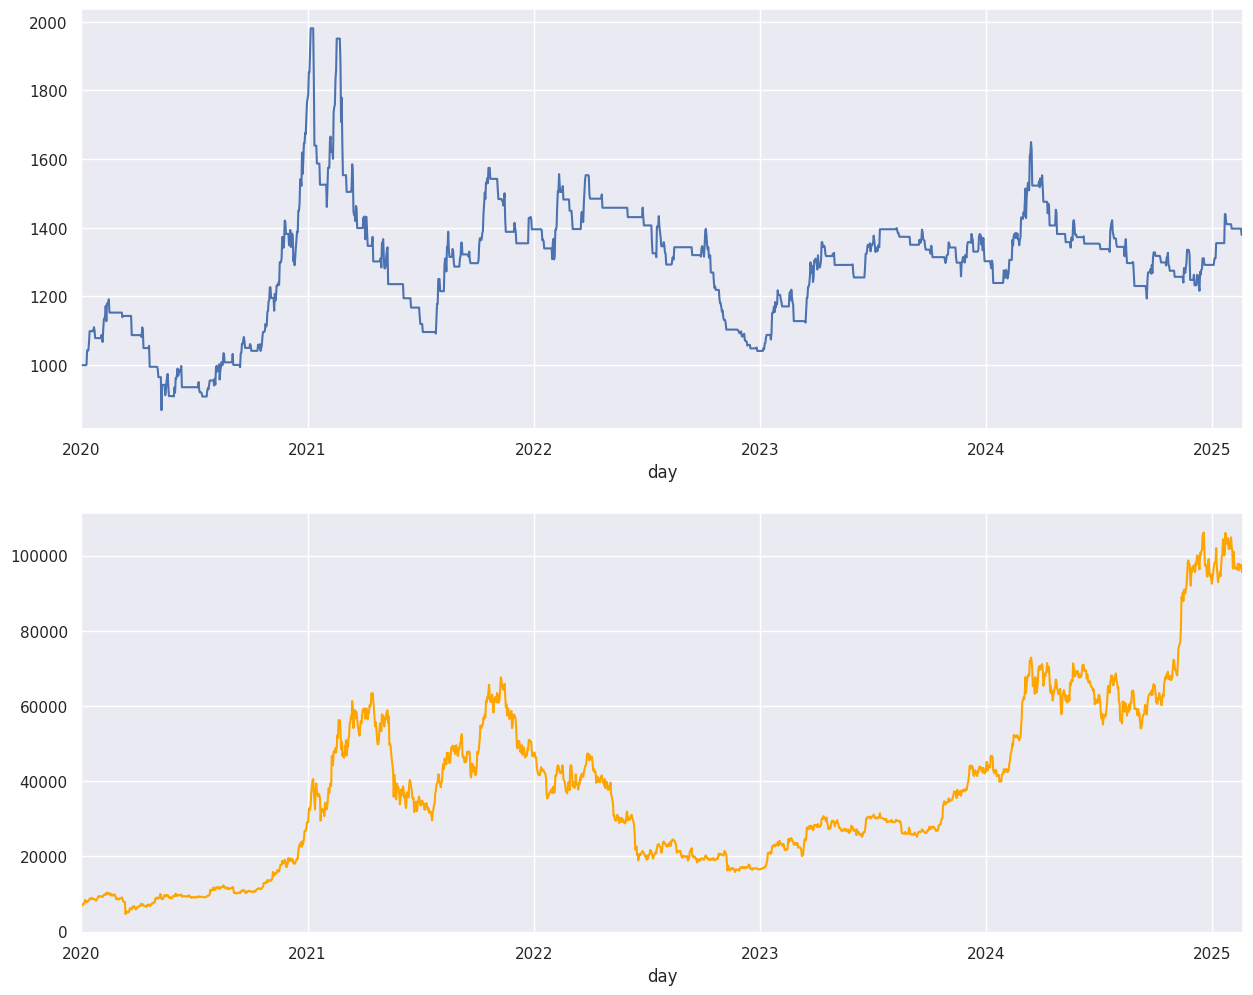

In [65]:
dfTest = df.copy()
initial_wallet = 1000 # Somme d'usd au début de la stratégie
taker_fee = 0.0007 # ~ 0.07% de frais sur binance et ftx

sl_price = 0
tp_price = 1000000

# Initalisation de notre portefeuille
wallet = initial_wallet
usd = initial_wallet
coin = 0

# Initialisation de nos tableaux qui vont contenir nos données d'analyse
trades_hitory = []
days_history = []
previous_day = 0
buy_ready = True

previous_row = df.iloc[0].copy()

def buy_condition(row, previous_row=None):
    if row["BOL_LOWER"] == 0 and previous_row["BOL_LOWER"] == 1 and row['close'] > row['SMA200'] and row['close'] < row['SMA9']:
        return True
    else:
        return False

def sell_condition(row, previous_row=None):
    if row['close'] >10000000 :
        return True
    else:
        return False


# Simulation de notre stratégie en parcourant notre tableau ligne par ligne
for index, row in df.iterrows():

    # Garde en mémoire l'évolution de notre portefeuille chaque jour pour pouvoir analyser plus tard
    current_day = index.day
    if previous_day != current_day:
        temp_wallet = wallet
        if coin > 0:
            temp_wallet = coin*row['close']
        days_history.append({
            "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
            "wallet":temp_wallet,
            "price":row['close']
        })
    previous_day = current_day

    # Vérifie les conditions si l'on doit acheter
    if buy_condition(row, previous_row) == True and usd > 0 and buy_ready == True:
        # Condition vérifiée, on achète à la clotûre
        coin = usd / row['close']
        fee = taker_fee * coin
        coin = coin - fee
        usd = 0
        wallet = coin * row['close']
        # Ajout de données pour analyse future
        buy_data = {
            'date': index,
            'position': 'buy',
            'price': row['close'],
            'fee': fee * row['close'],
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "market"
        }
        trades_hitory.append(buy_data)
        sl_price = min(row['low'],previous_row['low']) - row['ATR'] # A editer si l'on souhaite ajouter un sl
        tp_price = row['SMA9']*1.05 # A editer si l'on souhaite ajouter un tp


    elif row['low'] < sl_price and coin > 0:
        # On vend au prix du stop loss
        usd = coin * sl_price
        fee = taker_fee * usd
        usd = usd - fee
        coin = 0
        wallet = usd
        # Ajout de données pour analyse future
        sell_data = {
            'date': index,
            'position': 'sell',
            'price': sl_price,
            'fee': fee,
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "stop loss"
        }
        trades_hitory.append(sell_data)
        # buy_ready = False # A commenter si l'on ne veut pas bloquer les prochains achats

    elif row['high'] > tp_price and coin > 0:
        # On vend au prix du stop loss
        usd = coin * tp_price
        fee = taker_fee * usd
        usd = usd - fee
        coin = 0
        wallet = usd
        # Ajout de données pour analyse future
        sell_data = {
            'date': index,
            'position': 'sell',
            'price': tp_price,
            'fee': fee,
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "take profit"

        }
        trades_hitory.append(sell_data)
        # buy_ready = False # A commenter si l'on ne veut pas bloquer les prochains achats

    # Vérifie les conditions si l'on doit vendre
    elif sell_condition(row, previous_row) == True:
        buy_ready = True
        if coin > 0:
            # Condition vérifiée, on vend à la clotûre
            usd = coin * row['close']
            fee = taker_fee * usd
            usd = usd - fee
            coin = 0
            wallet = usd
            # Ajout de données pour analyse future
            sell_data = {
                'date': index,
                'position': 'sell',
                'price': row['close'],
                'fee': fee,
                'usd': usd,
                'coin': coin,
                'wallet': wallet,
                'reason': "market"
            }
            trades_hitory.append(sell_data)

    previous_row = row

# Convertit en tableau exploitable les données récupérer lors de la simulation
df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])

df_trades = pd.DataFrame(trades_hitory)
df_trades['date'] = pd.to_datetime(df_trades['date'])
df_trades = df_trades.set_index(df_trades['date'])

def plot_wallet_vs_asset(df_days):
    fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=1)
    df_days['wallet'].plot(ax=axes[0])
    df_days['price'].plot(ax=axes[1], color='orange')

def show_analys(days, trades):
    df_trades = trades.copy()
    df_days = days.copy()

    df_days['evolution'] = df_days['wallet'].diff()
    df_trades['trade_result'] = df_trades['wallet'].diff()
    df_trades['trade_result_pct'] = df_trades['wallet'].pct_change()

    df_days['wallet_ath'] = df_days['wallet'].cummax()
    df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
    df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']

    initial_wallet = df_days.iloc[0]["wallet"]

    close_trades = df_trades.loc[df_trades['position'] == 'sell']
    good_trades = close_trades.loc[close_trades['trade_result_pct'] > 0]
    total_trades = len(close_trades)
    total_good_trades = len(good_trades)
    avg_profit = close_trades['trade_result_pct'].mean()
    global_win_rate = total_good_trades / total_trades
    max_days_drawdown = df_days['drawdown_pct'].max()
    final_wallet = df_days.iloc[-1]['wallet']
    buy_and_hold_pct = (df_days.iloc[-1]['price'] - df_days.iloc[0]['price']) / df_days.iloc[0]['price']
    buy_and_hold_wallet = initial_wallet + initial_wallet * buy_and_hold_pct
    vs_hold_pct = (final_wallet - buy_and_hold_wallet)/buy_and_hold_wallet
    vs_usd_pct = (final_wallet - initial_wallet)/initial_wallet
    total_fee = df_trades['fee'].sum()

    best_trade = df_trades['trade_result_pct'].max()
    best_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == best_trade].iloc[0]['date'])
    worst_trade = df_trades['trade_result_pct'].min()
    worst_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == worst_trade].iloc[0]['date'])

    print("Period: [{}] -> [{}]".format(df_days.iloc[0]["day"], df_days.iloc[-1]["day"]))
    print("Initial wallet: {} $".format(round(initial_wallet,2)))

    print("\n--- General Information ---")
    print("Final wallet: {} $".format(round(final_wallet,2)))
    print("Performance vs US dollar: {} %".format(round(vs_usd_pct*100,2)))
    print("Worst Drawdown : -{}%".format(round(max_days_drawdown*100, 2)))
    print("Buy and hold performance: {} %".format(round(buy_and_hold_pct*100,2)))
    print("Performance vs buy and hold: {} %".format(round(vs_hold_pct*100,2)))
    print("Total trades on the period: {}".format(total_trades))
    print("Global Win rate: {} %".format(round(global_win_rate*100, 2)))
    print("Average Profit: {} %".format(round(avg_profit*100, 2)))
    print("Total fee: {} $".format(round(total_fee, 2)))

    print("\nBest trades: +{} % the {}".format(round(best_trade*100, 2), best_trade_date))
    print("Worst trades: {} % the {}".format(round(worst_trade*100, 2), worst_trade_date))

# Fonction pour afficher une analyse complète de la stratégie sur le passé
show_analys(df_days.loc[:], df_trades.loc[:])

print("\n--- Plot wallet evolution vs asset ---")
# Fonction pour afficher une analyse complète de la stratégie sur le passé
plot_wallet_vs_asset(df_days.loc[:])

In [36]:
df_trades[-20:]

,date,position,price,fee,usd,coin,wallet,reason
date,,,,,,,,
2021-11-01 04:00:00,2021-11-01 04:00:00,buy,62183.440000,0.684289,0.000000,0.015710,976.871084,market
2021-11-01 08:00:00,2021-11-01 08:00:00,sell,60818.212333,0.668797,954.755235,0.000000,954.755235,take profit
2021-12-02 04:00:00,2021-12-02 04:00:00,buy,56748.990000,0.668329,0.000000,0.016812,954.086907,market
2021-12-02 08:00:00,2021-12-02 08:00:00,sell,56472.483667,0.664607,948.773564,0.000000,948.773564,take profit
2023-08-07 16:00:00,2023-08-07 16:00:00,buy,29139.230000,0.664141,0.000000,0.032537,948.109423,market
2023-08-07 20:00:00,2023-08-07 20:00:00,sell,29115.122000,0.663128,946.661888,0.000000,946.661888,take profit
2023-09-12 00:00:00,2023-09-12 00:00:00,buy,25804.720000,0.662663,0.000000,0.036660,945.999224,market
2023-09-12 04:00:00,2023-09-12 04:00:00,sell,25800.207333,0.662084,945.171707,0.000000,945.171707,take profit
2024-02-17 16:00:00,2024-02-17 16:00:00,buy,51378.170000,0.661620,0.000000,0.018383,944.510087,market
